<h2><center>Week 7 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the seventh lecture.

The exercise will be marked as passed if you show a reasonable understanding of the plotting concepts covered in the lecture. You do **not** have to make a perfect replica of the example plots to pass.

The exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing:
- one .py or .ipynb file with code
- the created figure as a *png* file. 
The name of the .zip **and** the .py/.ipynb file **and** the png file **must** be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, April 18, 2024.**

<h3 style="text-align:left;">Exercise - CO2 emissions<span style="float: right"></span></h3>

Re-create the plots found in ’plots.png’ using the data found in ’owid-co2-data-reduced.csv’ (source: https://github.com/owid/co2-data).

You do not have to make perfect replicas of the plots, but you should show that you are able to use the concepts shown in the lecture. If there are aspects of the plots you consider not to be reproducible given the information provided, comment this in your code. For instance, the size of dots may not be possible to reproduce exactly, and you will be awarded points for showing you are able to modify this parameter, where relevant, and pointing this out in your comments, rather than for reproducing the exact same dot size. The plots are made using matplotlib and seaborn, working on the dataframe.

Relevant concepts for exercise completion are:
- Saving
- Subplots (Object-oriented interface)
- Setting colors
- Adjusting axes limits
- Labels and legend
- Using seaborn together with pandas and matplotlib


Specific plot types requested:
- Line plot
- Violin plot
- Scatter plot

**Useful tips**:
- to select only the actual countries, check those that have an *iso_code* in the dataframe.
- the values "per capita" are obtained by normalizing to the population.
- the "percentage" values are obtained by normalizing on the total emissions.

**NB**: if you do not have seaborn installed, install it through *pip install seaborn*.






/var/folders/zq/yg7pkf_s2pd42zztjsr5x1n00000gn/T/ipykernel_22254/339338052.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_year['co2_per_capita'] = df_by_year['co2'] / df_by_year['population']
/var/folders/zq/yg7pkf_s2pd42zztjsr5x1n00000gn/T/ipykernel_22254/339338052.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_year['gdp_per_capita'] = df_by_year['gdp'] / df_by_year['population']


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

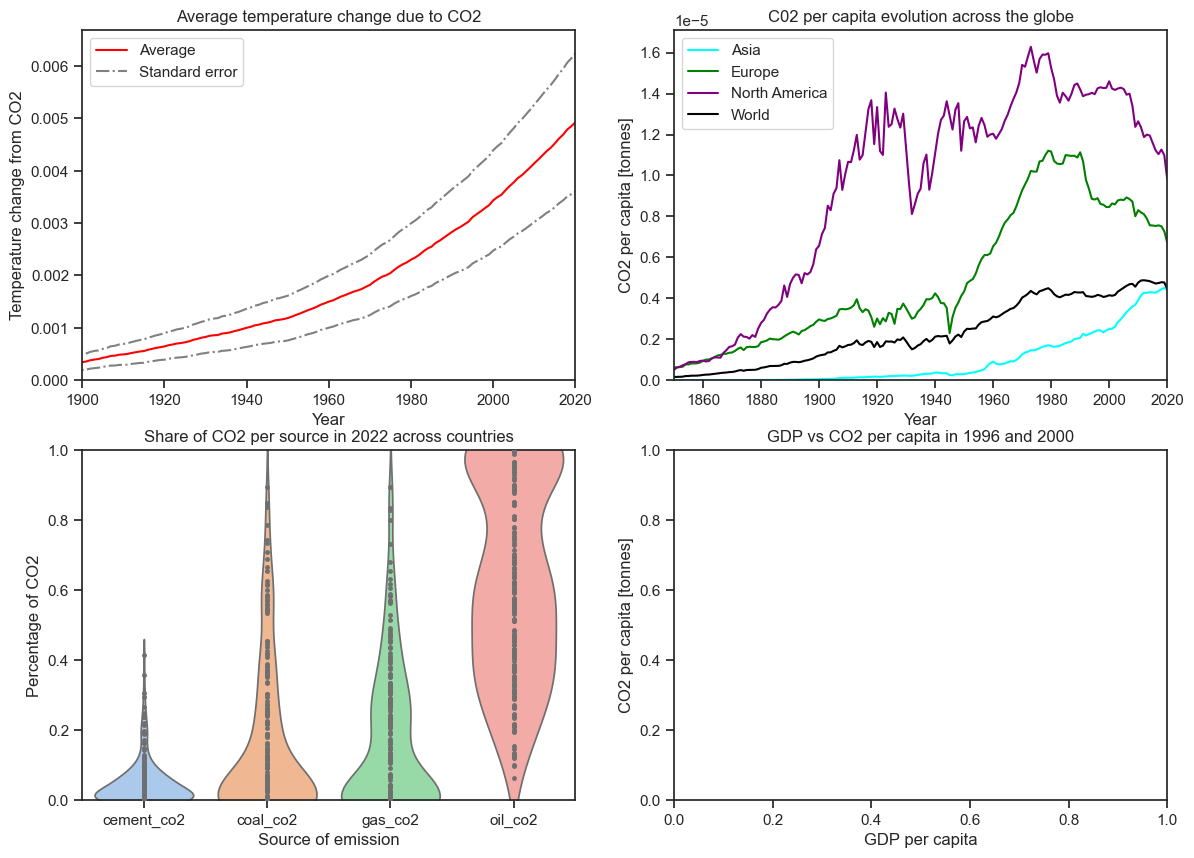

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def subplot1(fig: plt.Figure):
    plot: plt.Axes = fig.add_subplot(2, 2, 1)
    plot.set_title('Average temperature change due to CO2')
    plot.set_xlabel('Year')
    plot.set_ylabel('Temperature change from CO2')

    temp_change = df_nations_only.groupby('year')['temperature_change_from_co2'].mean()
    temp_error = df_nations_only.groupby('year')['temperature_change_from_co2'].sem()
    temp_upper_bound = temp_change + temp_error
    temp_lower_bound = temp_change - temp_error
    plot.plot(temp_change, color='red', label='Average')
    plot.plot(temp_lower_bound, color='grey', linestyle='dashdot', label='Standard error')
    plot.plot(temp_upper_bound, color='grey', linestyle='dashdot')
    plot.set_xlim(left=1900, right=2020)
    plot.set_ylim(bottom=0)
    plot.legend()


def subplot2(fig: plt.Figure):
    plot: plt.Axes = fig.add_subplot(2, 2, 2)
    plot.set_title('C02 per capita evolution across the globe')
    plot.set_xlabel('Year')
    plot.set_ylabel('CO2 per capita [tonnes]')
    group_by_county = df_co2_per_capita.groupby('country')
    for region in [('Asia', 'cyan'), ('Europe', 'green'), ('North America', 'purple'), (
    'World', 'black')]:  #setting color explicitly, since I found no color palette which would match the shown colors
        region_df = group_by_county.get_group(region[0])
        plot.plot(region_df['year'], region_df['co2_per_capita'], label=region[0], color=region[1])
    plot.set_xlim(left=1850, right=2020)
    plot.set_ylim(bottom=0)
    plot.legend()


def subplot3(fig: plt.Figure):
    plot: plt.Axes = fig.add_subplot(2, 2, 3)
    plot.set_title('Share of CO2 per source in 2022 across countries')
    plot.set_xlabel('Source of emission')
    plot.set_ylabel('Percentage of CO2')
    plot.set_ylim(bottom=0, top=1)
    data = df.groupby('year') # group data frame after year 
    data = data.get_group(2022) # get year 2022
    data = data[['cement_co2', 'coal_co2', 'gas_co2', 'oil_co2']] # select relevant columns 
    data_sum = data.sum(axis=1) # count total emissions for each country 
    # divide for each country and each co2 emission trough total emission to get percentuage of specific emission
    data_percentage = (data.div(data_sum,axis=0)) 
    
    # plot violin plot
    # i could not change the color like in the given plots, 
    # since there is no similar palette and I did'n find out how to change manually 
    sns.violinplot(data_percentage, inner = 'point')
    
    
    

def subplot4(fig: plt.Figure):
    plot: plt.Axes = fig.add_subplot(2, 2, 4)
    plot.set_title('GDP vs CO2 per capita in 1996 and 2000')
    plot.set_xlabel('GDP per capita')
    plot.set_ylabel('CO2 per capita [tonnes]')
    df_by_year = df[df['year'].isin([1996,2000])] # filter for 1996 and 2000
    df_by_year['co2_per_capita'] = df_by_year['co2'] / df_by_year['population']
    df_by_year['gdp_per_capita'] = df_by_year['gdp'] / df_by_year['population']
    
    for year in [(1996, 'cyan'), (2000, 'pink')]: 
        plot.scatter( x = df_by_year['gdp_per_capita'], y = df_by_year['co2_per_capita'], label = year[0], color = year[1])
    
    



sns.set_theme(style='ticks', palette='pastel')

df: pd.DataFrame = pd.read_csv('data/owid-co2-data-reduced.csv')
df_nations_only = df[df.iso_code.notnull()]  # keep only rows where iso code is net null, e.g. belongs to a country
df_co2_per_capita = df.assign(co2_per_capita=lambda x: df['co2'] / df['population'])



fig: plt.Figure = plt.figure(figsize=(14, 10))
subplot1(fig)
subplot2(fig)
df.groupby('iso_code').get_group('AFG')
subplot3(fig)
subplot4(fig)
sns.despine()
fig.tight_layout()
plt.show()
